# Notebook for analyzing Grenville thermochron data compilation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'

## Load in compilation file

In [2]:
study_summary = pd.read_csv('../data/Laurentia_thermochron_compilation/study_summary.csv')
study_summary = study_summary.sort_values(by='Age').reset_index(drop=1)

study_summary.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,Unnamed: 19
0,C-93-9,599.0,16.0,16.0,U/Pb,Reset,granite,"Zircon, Rutile",TIMS,Direct,Grenville Province,ON,44.91704,-77.10352,Sand Lake,Mazinaw terrane - Norway Lake granite,Plutonic,granite,"Corfu, F. and Easton, R.M., 1995. U-Pb geochro...",NaN
1,FA-810101,630.0,64.0,64.0,K/Ar,Igneous Crystallization,medium- to fine-grained massive dark grey diab...,Whole Rock,Ar Furnace-Fusion,Estimate,Grenville Province,QC,47.23340,-78.78313,3 km NW of the rapids below Lc des Cinq Milles...,Parauthochthonous Belt - unknown,Plutonic,medium- to fine-grained massive dark grey diab...,"Stevens, R.D., Delabio, R.N. and Lachance, G.R...",NaN
2,FA-810101A,654.0,46.0,46.0,K/Ar,Igneous Crystallization,fine- to medium-grained massive dark grey diab...,Whole Rock,Ar Furnace-Fusion,Estimate,Grenville Province,QC,47.23340,-78.78313,3 km NW of the rapids below Lac des Cinq Mille...,Parauthochthonous Belt - unknown,Plutonic,fine- to medium-grained massive dark grey diab...,"Stevens, R.D., Delabio, R.N. and Lachance, G.R...",NaN
3,SSA-10A,731.0,8.0,8.0,Ar/Ar,Cooling,pegmatite,K-Feldspar,Ar Furnace-Step,Estimate,Grenville Province,ON,45.50006,-78.24977,Approx. 50 km WSE of Pembroke. Location approx...,Central Gneiss Belt - unknown,Plutonic,pegmatite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19...",NaN
4,SSA-11B,758.0,8.0,8.0,Ar/Ar,Cooling,amphibolite,K-Feldspar,Ar Furnace-Fusion,Estimate,Grenville Province,ON,45.58339,-78.38311,Huntsville area. Location approximate.,Central Gneiss Belt - unknown,Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19...",NaN


### plot all ages

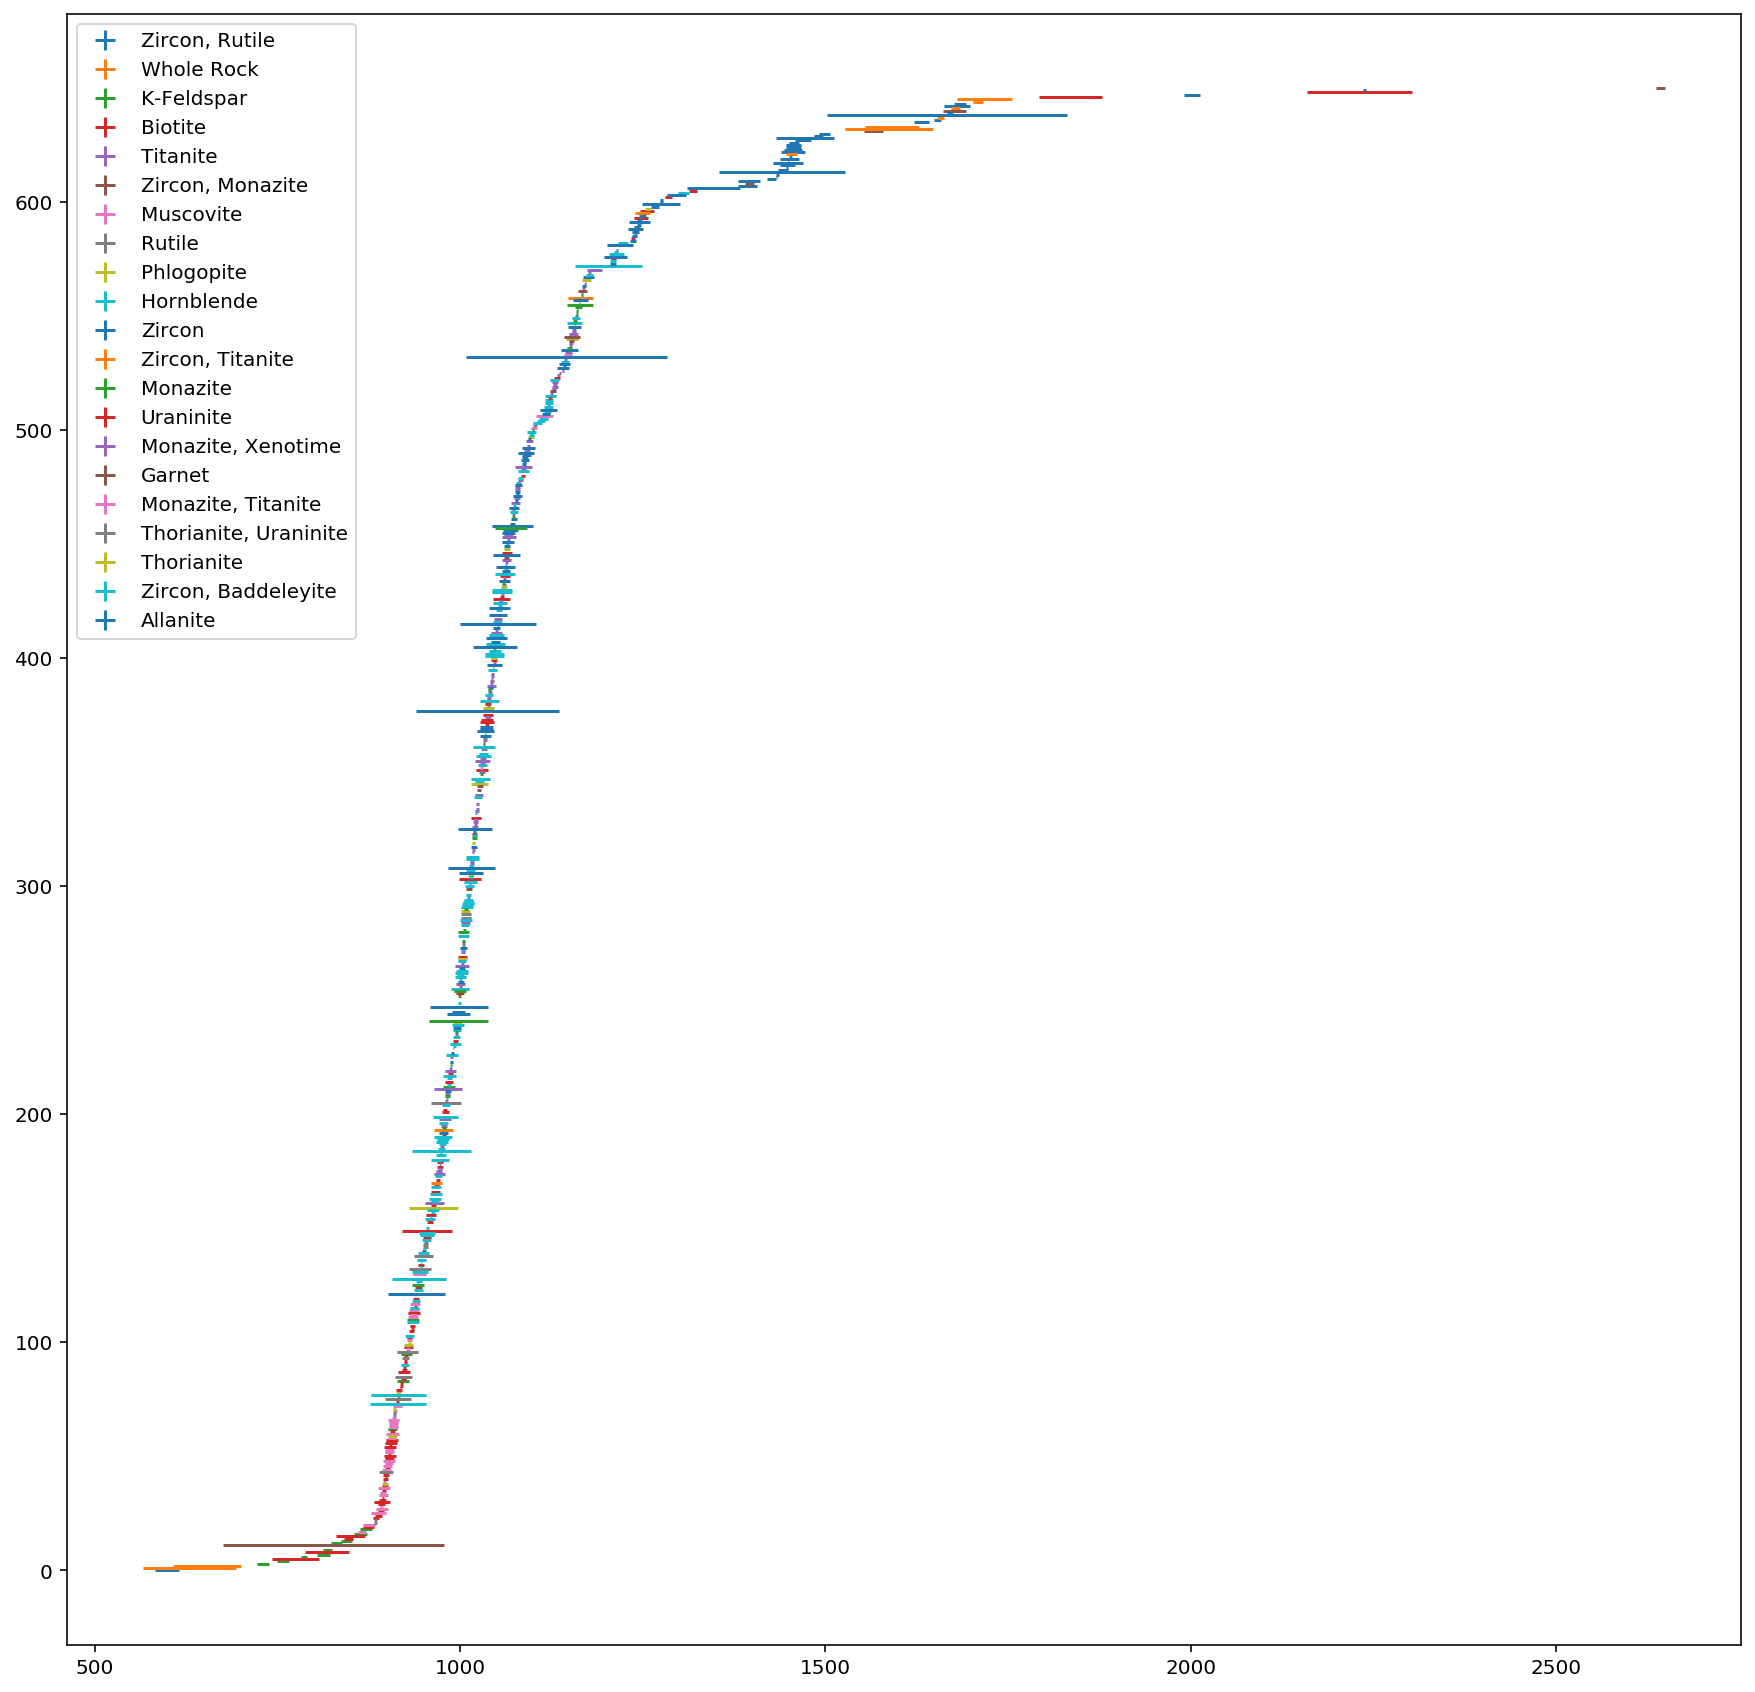

In [3]:
plt.figure(figsize=(15, 15))
for i in range(len(study_summary.Age_Material.unique())):
    this_material = study_summary[study_summary['Age_Material'] == study_summary.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index, 0, this_material['Error_Plus'], 
                 color='C'+str(i), ls='None', label=study_summary.Age_Material.unique()[i])
plt.legend()

### plot all rutile ages

<ErrorbarContainer object of 3 artists>

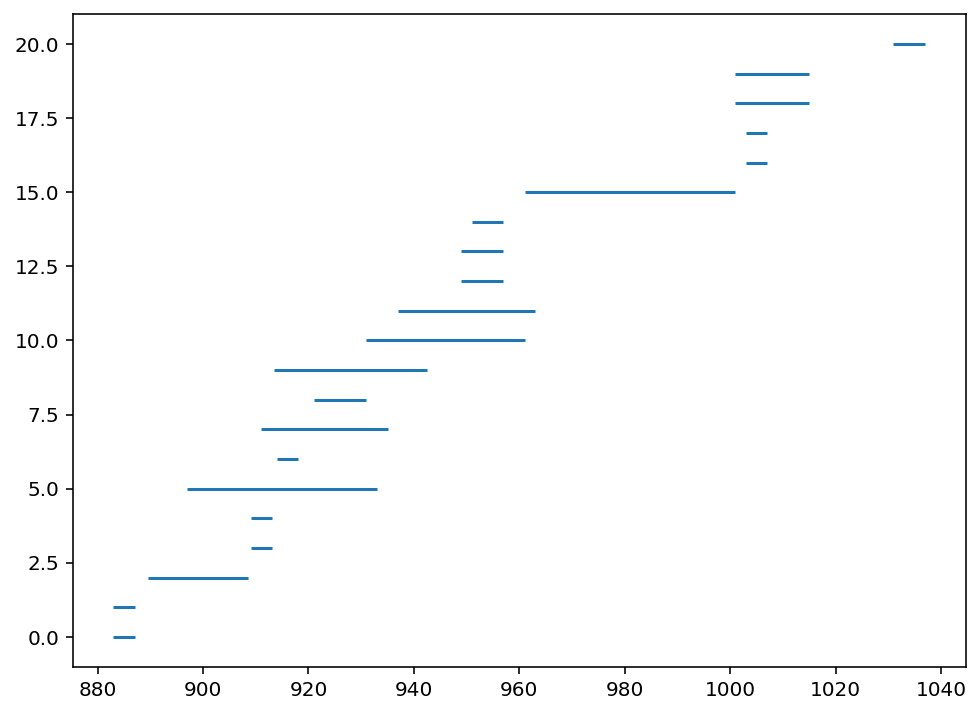

In [4]:
plt.figure(figsize=(8, 6))

rutile_data = study_summary[study_summary['Age_Material'] == 'Rutile'].reset_index(drop=1)
plt.errorbar(rutile_data['Age'], rutile_data.index, 0, rutile_data['Error_Plus'], 
                 color='C0', ls='None', label='rutile')
# plt.legend()

## Load Adirondack ages

In [5]:
Adirondack_ages = pd.read_csv('../data/Laurentia_thermochron_compilation/Adirondack_samples.csv')
Adirondack_ages = Adirondack_ages[Adirondack_ages['Age'] <= 1090]
Adirondack_ages = Adirondack_ages.sort_values(by='Age').reset_index(drop=1)
Adirondack_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,P17B,885.0,2.0,2.0,U/Pb,Cooling,NaN,Rutile,TIMS,NaN,Grenville Province,NY,43.29000,-74.52000,Adirondack Highlands,Adirondack Highlands,Metamorphic,metapelites,"Mezger, K., Hanson, G. N., & Bohlen, S. R. (19..."
1,SE596-49,895.0,1.0,1.0,Ar/Ar,Cooling,Plateau Age,Biotite,Laser-Step,Direct,Grenville Province,NY,44.39000,-75.19000,"On Rt 87, north of Dana Hill Rd. 1.9 miles sou...",Carthage-Colton shear zone,Metamorphic,amphibolite,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
2,AL97-12a,896.0,3.0,3.0,Ar/Ar,Cooling,NaN,Biotite,Laser-Step,NaN,Grenville Province,NY,44.44443,-75.18825,Adrondack Lowlands,Adrondack Lowlands,Metamorphic,Popple Hill gneiss,"Dahl, P.S., Pomfrey, M.E., and Foland, K.A., 2..."
3,AL97-31,898.0,3.0,3.0,Ar/Ar,Cooling,NaN,Biotite,Laser-Step,NaN,Grenville Province,NY,44.19778,-75.28213,Adrondack Lowlands,Adrondack Lowlands,Plutonic,Hermon granite,"Dahl, P.S., Pomfrey, M.E., and Foland, K.A., 2..."
4,PP596-60,899.0,1.0,1.0,Ar/Ar,Cooling,Plateau Age,Biotite,Laser-Step,Direct,Grenville Province,NY,44.53000,-75.04000,1 mile southwest of Pierrepont on Rt. 2. Outcr...,Carthage-Colton shear zone,Metamorphic,garnet biotite sillmanite schist,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."


### plot Adirondack titanite ages

In [6]:
Adirondack_titanite_data = Adirondack_ages[Adirondack_ages['Age_Material'] == 'Titanite'].reset_index(drop=1)

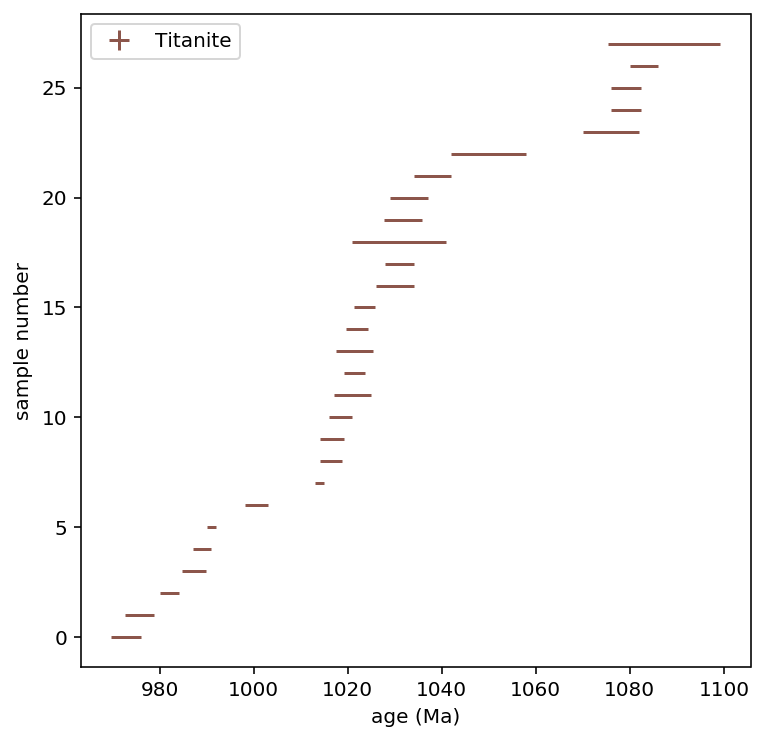

In [7]:
plt.figure(figsize=(6, 6))

plt.errorbar(Adirondack_titanite_data['Age'], Adirondack_titanite_data.index, 0, Adirondack_titanite_data['Error_Plus'], 
                 color='C5', ls='None', label='Titanite')
plt.xlabel('age (Ma)')
plt.ylabel('sample number')
plt.legend()

### plot Adirondack hornblende ages

In [30]:
Adirondack_hornblende_data = Adirondack_ages[Adirondack_ages['Age_Material'] == 'Hornblende'].reset_index(drop=1)

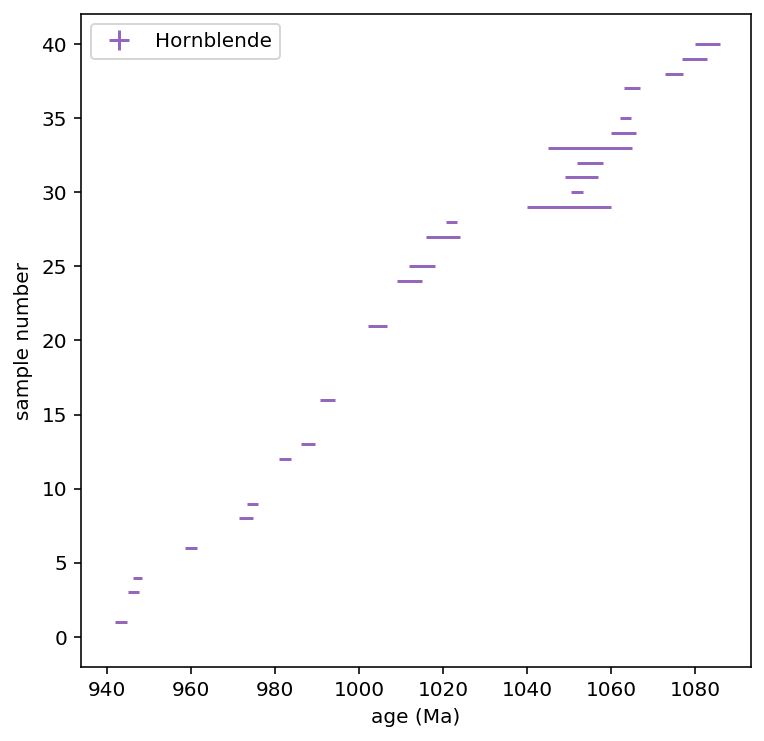

In [31]:
plt.figure(figsize=(6, 6))

plt.errorbar(Adirondack_hornblende_data['Age'], Adirondack_hornblende_data.index, 0, Adirondack_hornblende_data['Error_Plus'], 
                 color='C4', ls='None', label='Hornblende')
plt.xlabel('age (Ma)')
plt.ylabel('sample number')
plt.legend()

### plot Adirondack monazite ages

In [10]:
Adirondack_monazite_data = Adirondack_ages[Adirondack_ages['Age_Material'] == 'Monazite'].reset_index(drop=1)

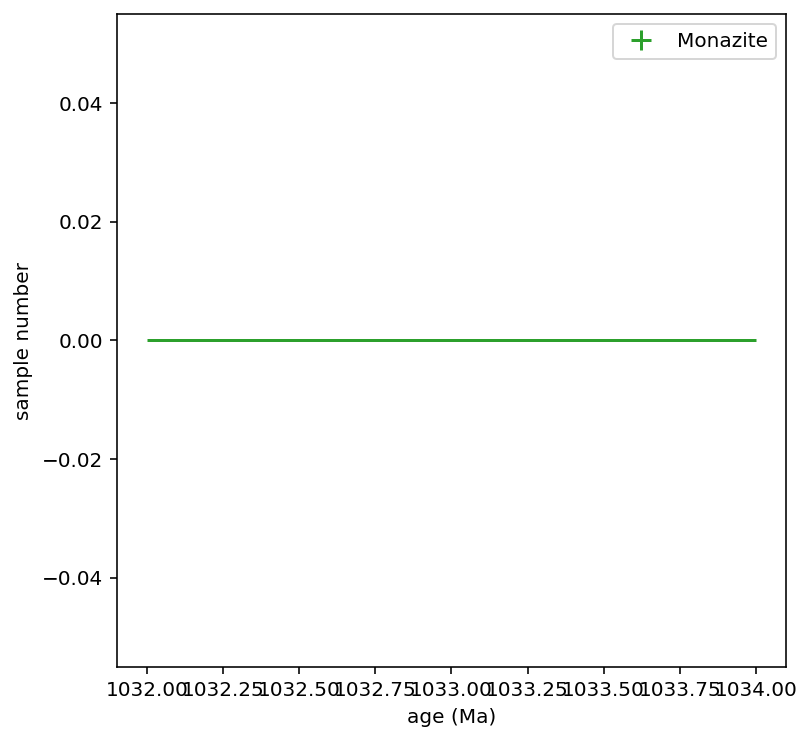

In [11]:
plt.figure(figsize=(6, 6))

plt.errorbar(Adirondack_monazite_data['Age'], Adirondack_monazite_data.index, 0, Adirondack_monazite_data['Error_Plus'], 
                 color='C2', ls='None', label='Monazite')
plt.xlabel('age (Ma)')
plt.ylabel('sample number')
plt.legend()

### plot Adirondack rutile ages

In [12]:
Adirondack_rutile_data = Adirondack_ages[Adirondack_ages['Age_Material'] == 'Rutile'].reset_index(drop=1)

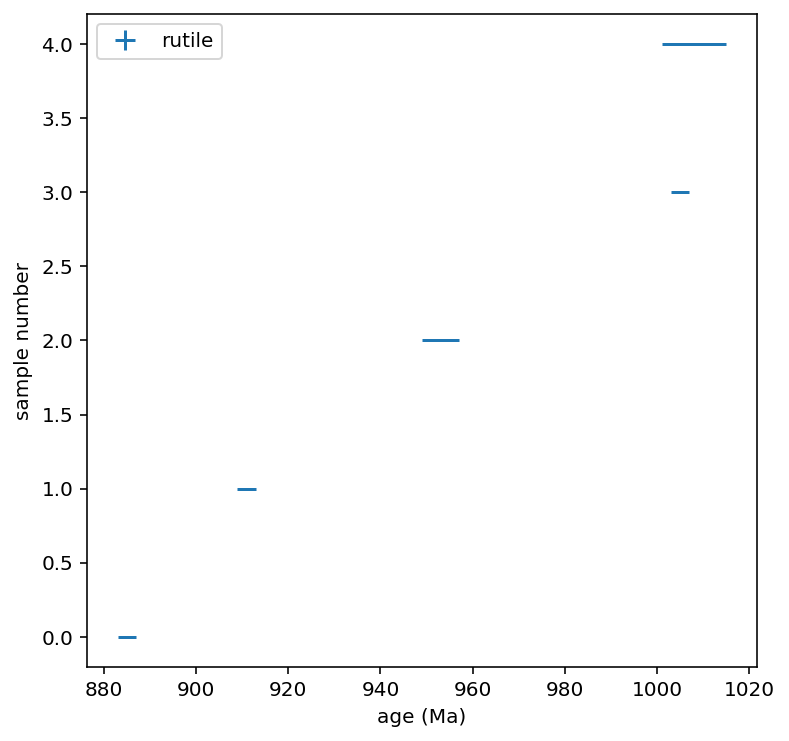

In [13]:
plt.figure(figsize=(6, 6))

plt.errorbar(Adirondack_rutile_data['Age'], Adirondack_rutile_data.index, 0, Adirondack_rutile_data['Error_Plus'], 
                 color='C0', ls='None', label='rutile')
plt.xlabel('age (Ma)')
plt.ylabel('sample number')
plt.legend()

### plot Adirondack biotite ages

In [14]:
Adirondack_biotite_data = Adirondack_ages[Adirondack_ages['Age_Material'] == 'Biotite'].reset_index(drop=1)

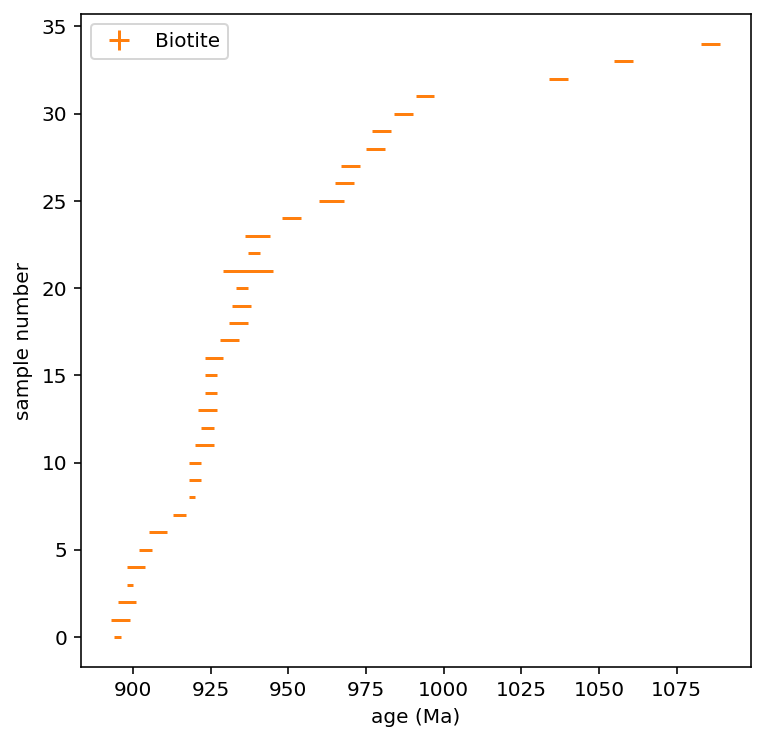

In [15]:
plt.figure(figsize=(6, 6))

plt.errorbar(Adirondack_biotite_data['Age'], Adirondack_biotite_data.index, 0, Adirondack_biotite_data['Error_Plus'], 
                 color='C1', ls='None', label='Biotite')
plt.xlabel('age (Ma)')
plt.ylabel('sample number')
plt.legend()

## Let's use general constraints on the closure temperatures for the minerals.

- Biotite: 280 +- 40
- Hornblende: 530 +- 40
- Monazite: 600-650
- Titanite: 660-700
- Rutile: 500-540



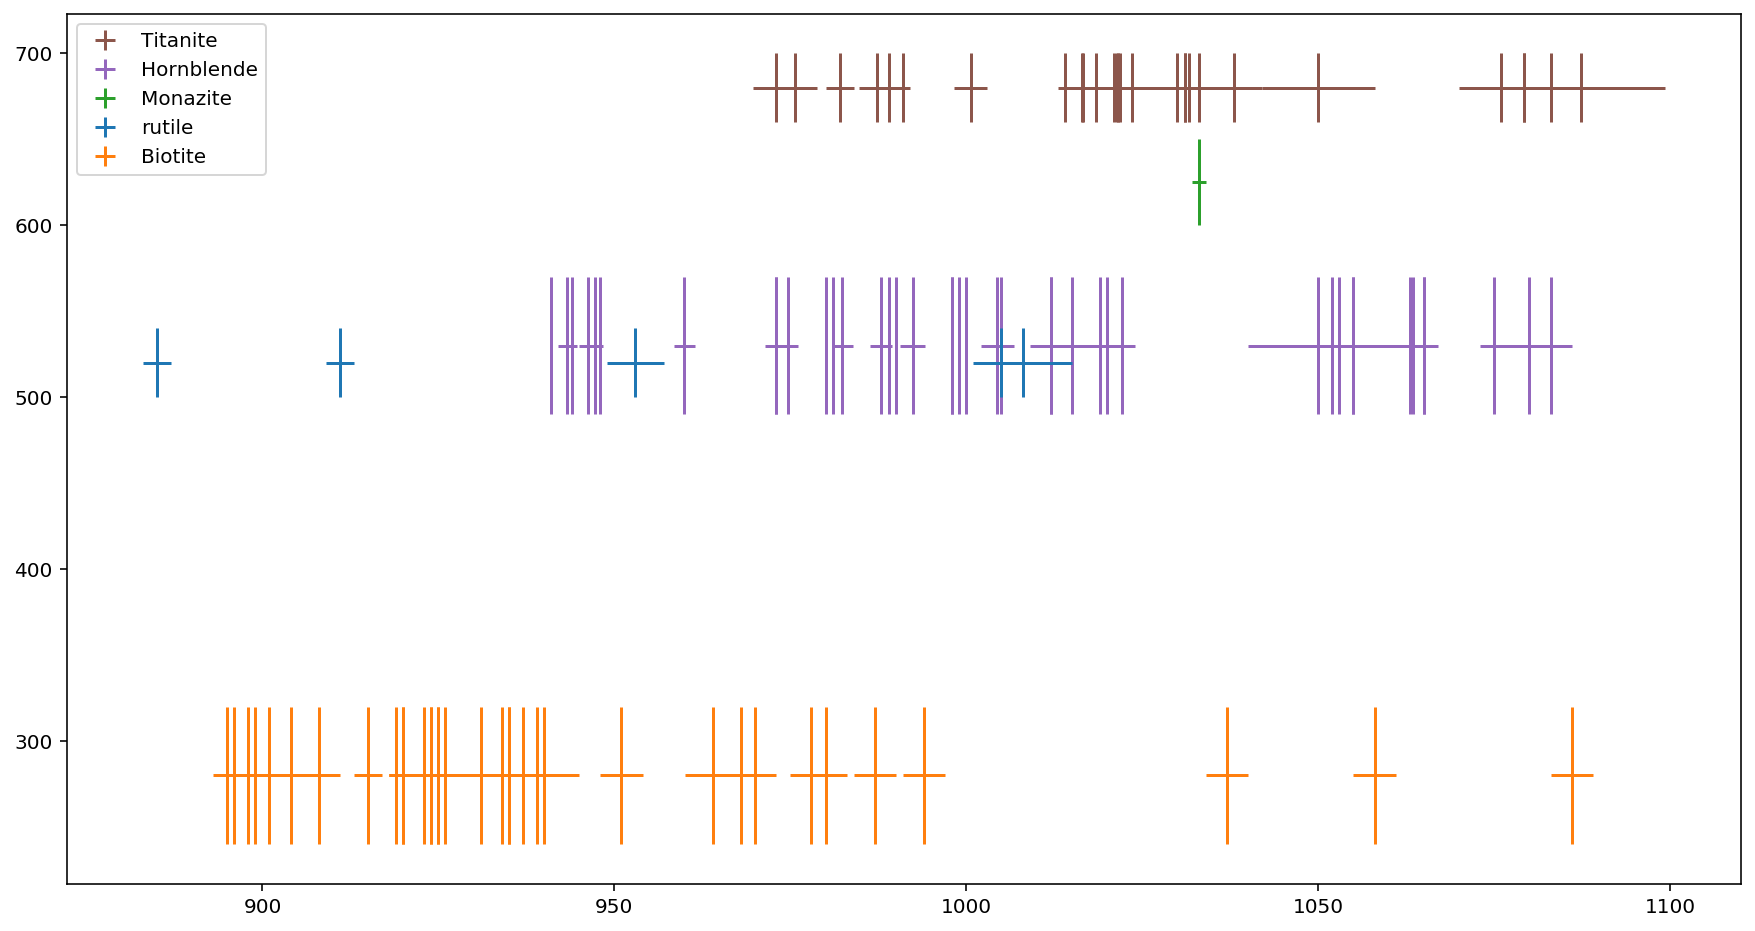

In [32]:
plt.figure(figsize=(15, 8))

plt.errorbar(Adirondack_titanite_data['Age'], np.full(Adirondack_titanite_data.shape[0], 680), 20, Adirondack_titanite_data['Error_Plus'], 
                 color='C5', ls='None', label='Titanite')
plt.errorbar(Adirondack_hornblende_data['Age'], np.full(Adirondack_hornblende_data.shape[0], 530), 40, Adirondack_hornblende_data['Error_Plus'], 
                 color='C4', ls='None', label='Hornblende')
plt.errorbar(Adirondack_monazite_data['Age'], np.full(Adirondack_monazite_data.shape[0], 625), 25, Adirondack_monazite_data['Error_Plus'], 
                 color='C2', ls='None', label='Monazite')
plt.errorbar(Adirondack_rutile_data['Age'], np.full(Adirondack_rutile_data.shape[0], 520), 20, Adirondack_rutile_data['Error_Plus'], 
                 color='C0', ls='None', label='rutile')
plt.errorbar(Adirondack_biotite_data['Age'], np.full(Adirondack_biotite_data.shape[0], 280), 40, Adirondack_biotite_data['Error_Plus'], 
                 color='C1', ls='None', label='Biotite')

plt.legend()
plt.show()

## test bootstrap

this assumes the sampling of ages are independent, which is not the case

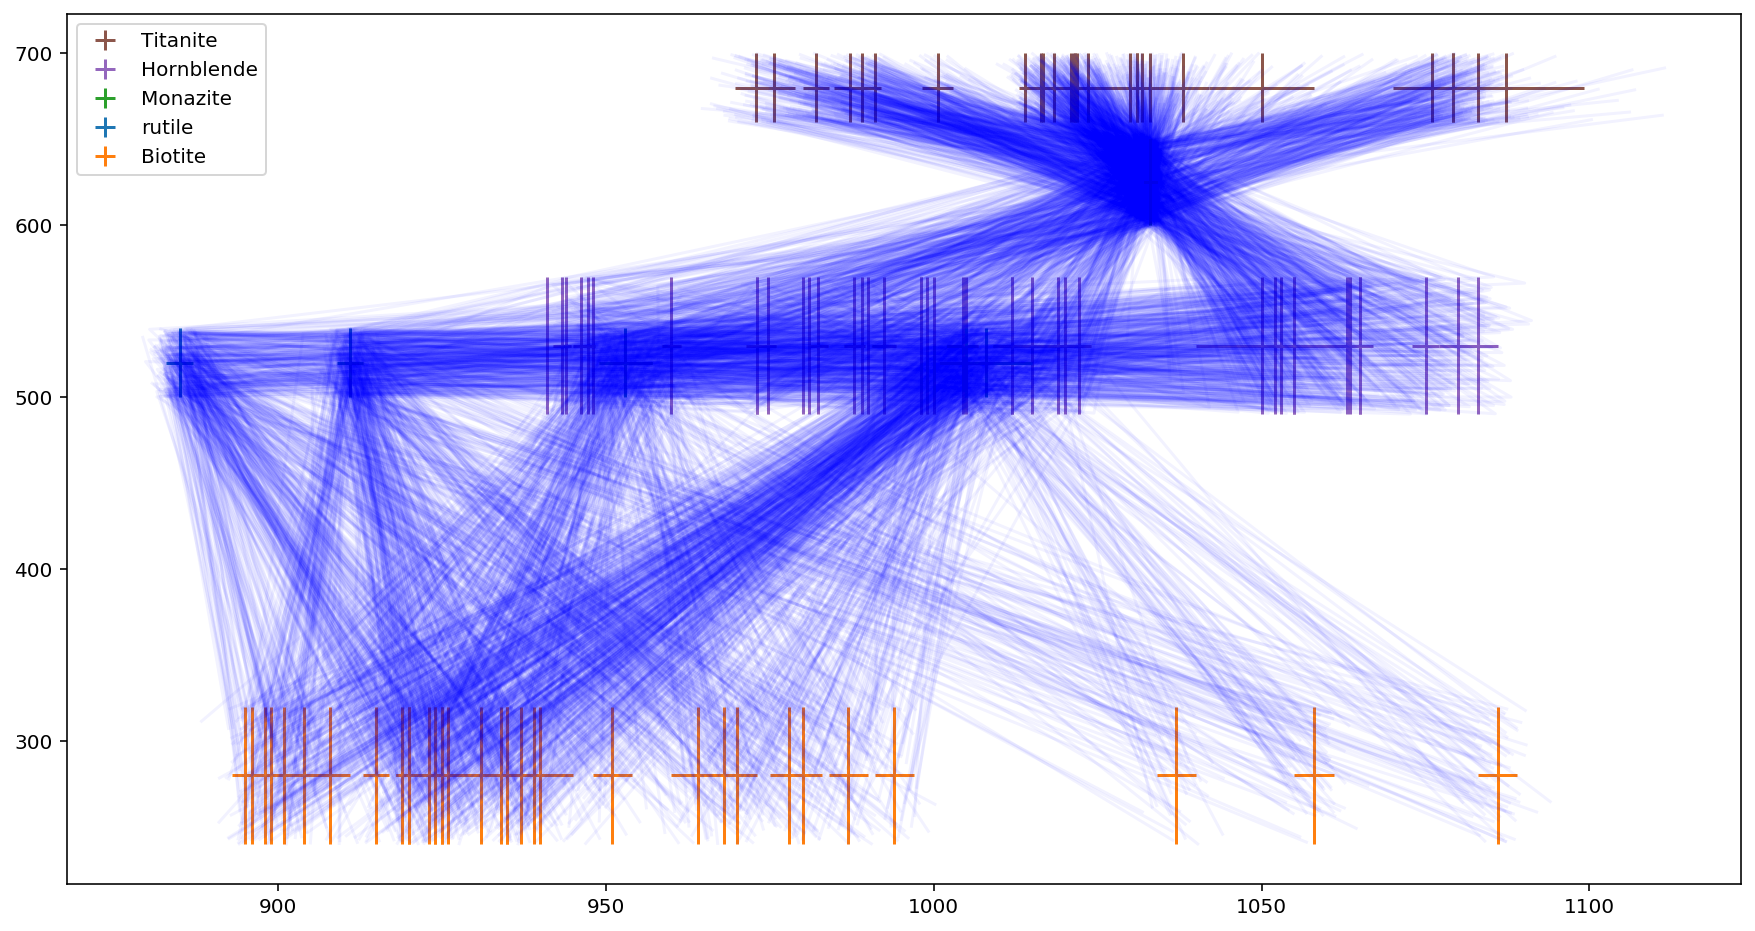

In [35]:
n_samples = 2000
titanite_temp = np.random.uniform(660, 700, n_samples)
monazite_temp = np.random.uniform(600, 650, n_samples)
hornblende_temp = np.random.uniform(490, 570, n_samples)
rutile_temp = np.random.uniform(500, 540, n_samples)
biotite_temp = np.random.uniform(240, 320, n_samples)
temp_samples = np.stack((titanite_temp, monazite_temp, hornblende_temp, rutile_temp, biotite_temp), axis=-1)

plt.figure(figsize=(15, 8))

plt.errorbar(Adirondack_titanite_data['Age'], np.full(Adirondack_titanite_data.shape[0], 680), 20, Adirondack_titanite_data['Error_Plus'], 
                 color='C5', ls='None', label='Titanite')
plt.errorbar(Adirondack_hornblende_data['Age'], np.full(Adirondack_hornblende_data.shape[0], 530), 40, Adirondack_hornblende_data['Error_Plus'], 
                 color='C4', ls='None', label='Hornblende')
plt.errorbar(Adirondack_monazite_data['Age'], np.full(Adirondack_monazite_data.shape[0], 625), 25, Adirondack_monazite_data['Error_Plus'], 
                 color='C2', ls='None', label='Monazite')
plt.errorbar(Adirondack_rutile_data['Age'], np.full(Adirondack_rutile_data.shape[0], 520), 20, Adirondack_rutile_data['Error_Plus'], 
                 color='C0', ls='None', label='rutile')
plt.errorbar(Adirondack_biotite_data['Age'], np.full(Adirondack_biotite_data.shape[0], 280), 40, Adirondack_biotite_data['Error_Plus'], 
                 color='C1', ls='None', label='Biotite')

for i in range(n_samples):
    this_titanite = Adirondack_titanite_data.sample(n=1)
    this_titanite_age = np.random.normal(this_titanite['Age'], this_titanite['Error_Plus'], 1)
    
    this_monazite = Adirondack_monazite_data.sample(n=1)
    this_monazite_age = np.random.normal(this_monazite['Age'], this_monazite['Error_Plus'], 1)
    
    this_hornblende = Adirondack_hornblende_data.sample(n=1)
    this_hornblende_age = np.random.normal(this_hornblende['Age'], this_hornblende['Error_Plus'], 1)
    
    this_rutile = Adirondack_rutile_data.sample(n=1)
    this_rutile_age = np.random.normal(this_rutile['Age'], this_rutile['Error_Plus'], 1)
    
    this_biotite = Adirondack_biotite_data.sample(n=1)
    this_biotite_age = np.random.normal(this_biotite['Age'], this_biotite['Error_Plus'], 1)
    
    ages = np.stack((this_titanite_age, this_monazite_age, this_hornblende_age, this_rutile_age, this_biotite_age))
    
    plt.plot( ages , temp_samples[i], color = 'b', alpha = 0.05)
    
plt.legend()
plt.show()